In [108]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly_express as px

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
# from scipy.cluster.vq import vq, kmeans as sp_km

In [110]:
%matplotlib inline
matplotlib.style.use('ggplot')

In [ ]:
docs = pd.read_csv('winereviews.csv')
docs = docs.set_index('id')

In [112]:
docs.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
id,,,,,,,,,,,,,
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [113]:
label_dict = docs.country.value_counts()

In [114]:
TOP15 = label_dict[:15].index

In [115]:
TOP15

Index(['US', 'France', 'Italy', 'Spain', 'Portugal', 'Chile', 'Argentina',
       'Austria', 'Australia', 'Germany', 'New Zealand', 'South Africa',
       'Israel', 'Greece', 'Canada'],
      dtype='object')

In [ ]:
tv = TfidfVectorizer(stop_words='english', max_features=500, sublinear_tf=True)

In [235]:
SAMPLE = docs[docs.country.isin(TOP15)].groupby('country').apply(lambda x: x.sample(100))
SAMPLE.index = SAMPLE.index.droplevel(0)

In [236]:
SAMPLE.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
id,,,,,,,,,,,,,
30649,Argentina,"Opens with heat and brambly, scratchy aromas o...",Urban Uco,84,14.0,Mendoza Province,Uco Valley,NaN,Michael Schachner,@wineschach,O. Fournier 2009 Urban Uco Tempranillo (Uco Va...,Tempranillo,O. Fournier
75612,Argentina,Cherry and plum aromas carry the mildest touch...,Alta,85,9.0,Other,Tulum Valley,NaN,Michael Schachner,@wineschach,Callia 2008 Alta Malbec (Tulum Valley),Malbec,Callia
81838,Argentina,"Typical varietal aromas of lychee, citrus and ...",Serie A,89,15.0,Other,Salta,NaN,Michael Schachner,@wineschach,Zuccardi 2014 Serie A Torrontés (Salta),Torrontés,Zuccardi
20018,Argentina,"Leafy, herbal aromas of spicy berry fruits lea...",Coleccion,86,12.0,Other,Calchaquí Valley,NaN,Michael Schachner,@wineschach,Michel Torino 2014 Coleccion Cabernet Sauvigno...,Cabernet Sauvignon,Michel Torino
35825,Argentina,"Although this is grassy and wiry smelling, the...",Expresiones Reserve,88,15.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Finca Flichman 2011 Expresiones Reserve Malbec...,Malbec-Cabernet Sauvignon,Finca Flichman


In [237]:
m = tv.fit_transform(SAMPLE.description)

In [238]:
clusters = KMeans(5).fit(m)

In [239]:
SAMPLE['cluster'] = clusters.labels_

In [241]:
CM = SAMPLE.groupby(['cluster','country']).country.agg('count').to_frame().unstack().fillna(0).T
CM.index = CM.index.droplevel(0)

In [242]:
# (CM.T / CM.T.sum()).T.style.background_gradient()

In [243]:
(CM.T / CM.T.sum()).T.style.background_gradient()

cluster,0,1,2,3,4
country,,,,,
Argentina,0.03,0.74,0.17,0,0.06
Australia,0.69,0.02,0.22,0.01,0.06
Austria,0.09,0,0.5,0.23,0.18
Canada,0.5,0.04,0.39,0.02,0.05
Chile,0.11,0.64,0.2,0.01,0.04
France,0.07,0,0.14,0.74,0.05
Germany,0.08,0,0.91,0,0.01
Greece,0.03,0.02,0.55,0,0.4
Israel,0.14,0.05,0.24,0,0.57


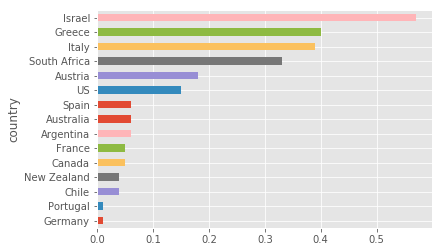

In [247]:
(CM.T/CM.T.sum()).T.sort_values(4, ascending=True)[4].plot.barh()